In [1]:
# Importar librerias
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import io # Importando el módulo io
import seaborn as sns # se usa para la visualización de datos.

In [2]:
#CARGAR ARCHIVO DE DATOS, DESCARGUÉ Y SUBI ARCHIVO LOCAL
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
#CARGAR DF EN LA VARIABLE
df = pd.read_csv(next(iter(uploaded)))

In [7]:
# ANALISIS EXPLORATORIO DE DATOS
print("/nInformacion general del dataset:")
print(df.info())




/nInformacion general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   i

El data set contiene:
26 variables numericas y 9 categoricas

In [8]:
#Descripción estadistico básico
print("/nEstadisticas descriptivas básicas:")
print(df.describe())


/nEstadisticas descriptivas básicas:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932

In [9]:
#Verificar valores nulos
print("/nCantidad de Valores nulos por columnas:")
print(df.isnull().sum())
#ver tipo de datos fecha, cuando trabajamos en python

/nCantidad de Valores nulos por columnas:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              

In [13]:
# Identificación de variables categóricas y numéricas
cat_vars = df.select_dtypes(include='object').columns.tolist()
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variables categóricas:", cat_vars)
print("Variables numéricas:", num_vars)

Variables categóricas: ['Attrition', 'BusinessTravel', 'EducationField', 'Over18', 'OverTime']
Variables numéricas: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [14]:
# Estadística descriptiva vs. inferencial (breve comparación)
print("\n---- Comparativa: Estadística Descriptiva vs. Inferencial ----")
print("Descriptiva: Analizamos los datos actuales de rotación para entender patrones.")
print("Inferencial: Podríamos determinar si las diferencias de salario entre grupos son significativas.")


---- Comparativa: Estadística Descriptiva vs. Inferencial ----
Descriptiva: Analizamos los datos actuales de rotación para entender patrones.
Inferencial: Podríamos determinar si las diferencias de salario entre grupos son significativas.


In [20]:
# Tabla cruzada entre Rotación y Campo Educativo (en lugar de Departamento)
print("\nTabla cruzada entre Rotación y Campo Educativo:")
print(pd.crosstab(df['Attrition'], df['EducationField']))


Tabla cruzada entre Rotación y Campo Educativo:
EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
No                           20            517        124      401     71   
Yes                           7             89         35       63     11   

EducationField  Technical Degree  
Attrition                         
No                           100  
Yes                           32  


In [21]:
# Medidas de tendencia central para variables
print("\nEstadísticas para Distancia desde Casa:")
print("Media =", df['DistanceFromHome'].mean())
print("Mediana =", df['DistanceFromHome'].median())
print("Moda =", df['DistanceFromHome'].mode()[0])
print("Desviación estándar =", df['DistanceFromHome'].std())
print("Cuartiles =\n", df['DistanceFromHome'].quantile([0.25, 0.5, 0.75]))


Estadísticas para Distancia desde Casa:
Media = 9.19251700680272
Mediana = 7.0
Moda = 2
Desviación estándar = 8.106864435666084
Cuartiles =
 0.25     2.0
0.50     7.0
0.75    14.0
Name: DistanceFromHome, dtype: float64


In [22]:
# Comparar medias por grupo de Attrition
print("\nComparación de medias por grupo de Attrition:")
for var in ['DistanceFromHome', 'TotalWorkingYears', 'NumCompaniesWorked']:
    print(f"\n{var}:")
    print(f"  Empleados que se van: {df[df['Attrition']=='Yes'][var].mean():.2f}")
    print(f"  Empleados que se quedan: {df[df['Attrition']=='No'][var].mean():.2f}")


Comparación de medias por grupo de Attrition:

DistanceFromHome:
  Empleados que se van: 10.63
  Empleados que se quedan: 8.92

TotalWorkingYears:
  Empleados que se van: 8.24
  Empleados que se quedan: 11.86

NumCompaniesWorked:
  Empleados que se van: 2.94
  Empleados que se quedan: 2.65


In [23]:
# Elemento de álgebra lineal: Matriz de correlación
print("\nCorrelación entre variables de experiencia laboral:")
corr_matriz = df[['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole']].corr()
print(corr_matriz)


Correlación entre variables de experiencia laboral:
                    TotalWorkingYears  YearsAtCompany  YearsInCurrentRole
TotalWorkingYears            1.000000        0.628133            0.460365
YearsAtCompany               0.628133        1.000000            0.758754
YearsInCurrentRole           0.460365        0.758754            1.000000


In [24]:
# Probabilidad (Investigación y Desarrollo)
total_rd = df[df['Department'] == 'Research & Development'].shape[0]
rotan_en_rd = df[(df['Department'] == 'Research & Development') & (df['Attrition'] == 'Yes')].shape[0]
prob = rotan_en_rd / total_rd
print(f"\nProbabilidad de rotación en I+D: {round(prob, 3)}")


Probabilidad de rotación en I+D: 0.138


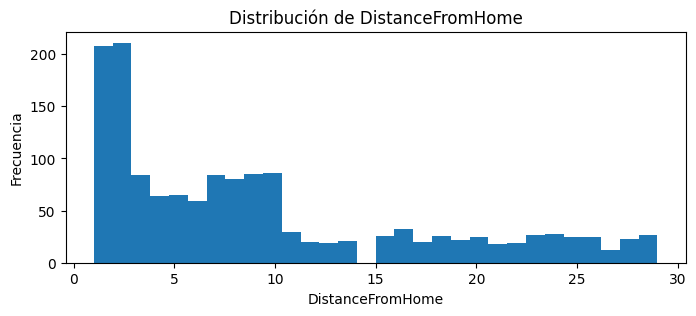

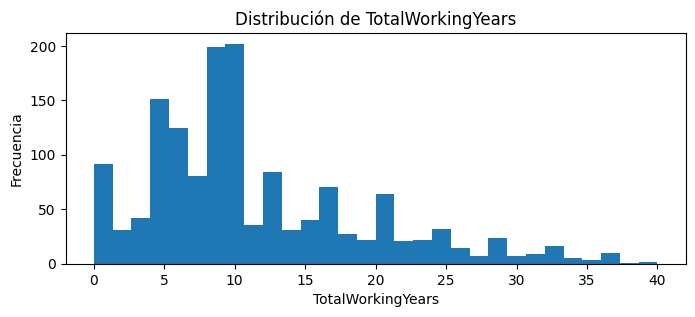

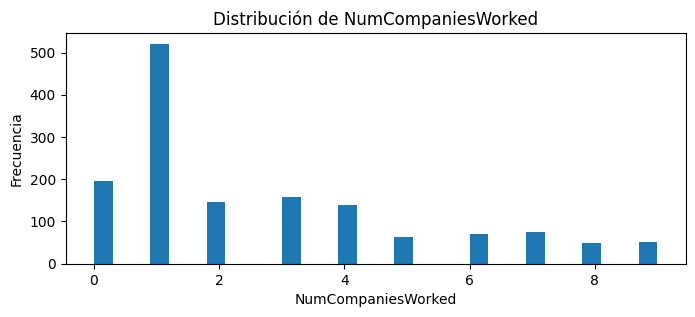

In [26]:
# Histogramas para variables numéricas
for var in ['DistanceFromHome', 'TotalWorkingYears', 'NumCompaniesWorked']:
    plt.figure(figsize=(8, 3))
    plt.hist(df[var], bins=30)
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {var}")
    plt.show()

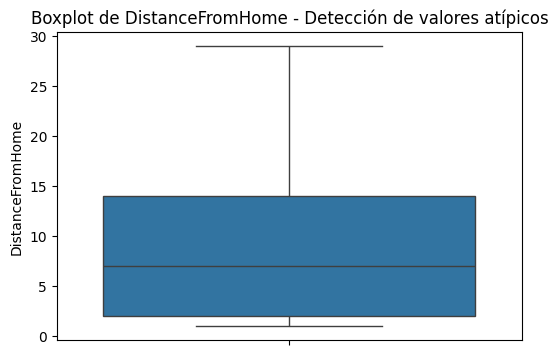

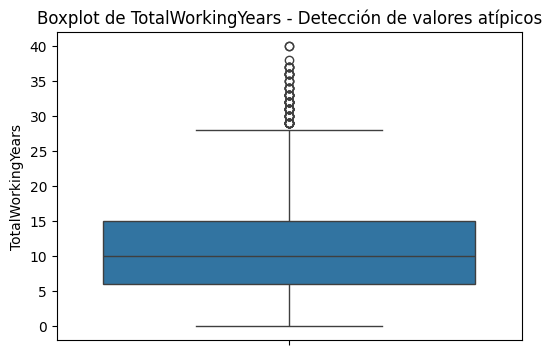

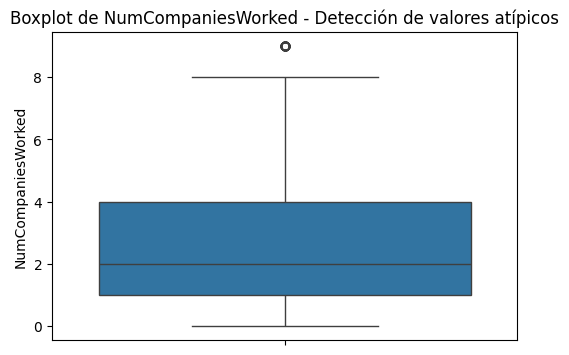

In [27]:
# Boxplots para detectar valores atípicos
for var in ['DistanceFromHome', 'TotalWorkingYears', 'NumCompaniesWorked']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot de {var} - Detección de valores atípicos')
    plt.show()

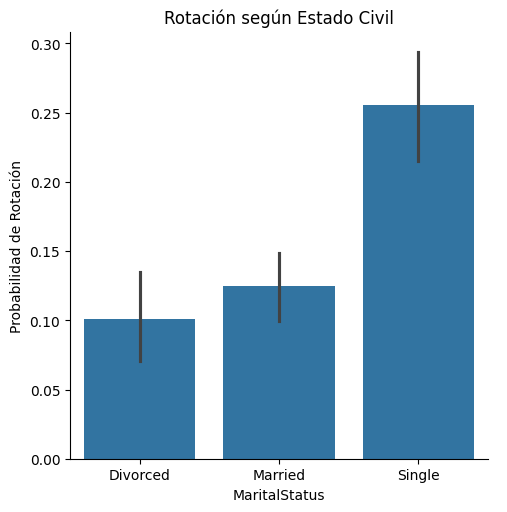

In [28]:
# Análisis de rotación por estado civil
df['Attrition_bin'] = df['Attrition'].map({'Yes': 1, 'No': 0})
g = sns.catplot(x="MaritalStatus", y="Attrition_bin", kind="bar", data=df, height=5)
g.set_ylabels("Probabilidad de Rotación")
plt.title("Rotación según Estado Civil")
plt.show()


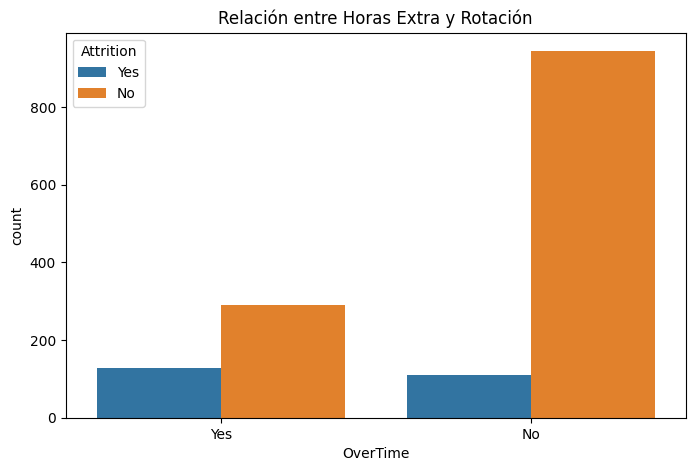

In [29]:
# Gráfico adicional: Horas extra y rotación
plt.figure(figsize=(8, 5))
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("Relación entre Horas Extra y Rotación")
plt.show()

CONCLUSIONES

1. Mayor riesgo de rotación: Empleados solteros, ya que trabajan horas extra, viven más lejos y tienen menos experiencia laboral.
2. Experiencia y estabilidad: Los empleados que permanecen tiene aproximadamente 3.6 años más de experiencia laboral.
3. Movilidad Laboral: Los que abandonas la empresa ahn trabajando antes en otras empresas.
4. Desplazameinto: La distancia entre el hogar y el trabajo es un 19% mayor en los empleados que rotan.
5. Campos educativos: RRHH y Grados Tecnicos tienen mayores tasas proporcionales de rotacion.